In [10]:
import pandas as pd

dataset = pd.read_csv("YRBS_rev2.csv")

In [11]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q95,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,1,88.16,4.97,111,270530,5,2015
1,7,2,4,1,1,1,1,1,1,1.73,...,8,1,1,1,67.56,3.93,111,270530,7,2015
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,1,11.21,5.01,111,270530,9,2015
3,4,2,2,1,1,1,1,1,2,1.78,...,4,1,2,1,68.28,4.02,111,270530,13,2015
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,1,3,68.88,4.01,111,270530,15,2015


In [12]:
colq88 = dataset["q88"]
dataset.drop(labels=['q88'], axis=1, inplace = True)
dataset.insert(123, 'q88', colq88)

In [13]:
dataset.head()

,q1,q2,q3,q4,q5_1,q5_2,q5_3,q5_4,q5_5,q6,...,q96,q98,q99,BMIPCT,weight,stratum,psu,record,year,q88
0,5,1,3,2,1,1,1,1,2,1.63,...,1,1,1,88.16,4.97,111,270530,5,2015,1
1,7,2,4,1,1,1,1,1,1,1.73,...,1,1,1,67.56,3.93,111,270530,7,2015,3
2,6,1,4,2,1,1,2,1,1,1.50,...,1,1,1,11.21,5.01,111,270530,9,2015,2
3,4,2,2,1,1,1,1,1,2,1.78,...,1,2,1,68.28,4.02,111,270530,13,2015,4
4,5,2,3,1,1,1,1,1,1,1.80,...,1,1,3,68.88,4.01,111,270530,15,2015,4


In [14]:
dataset.drop(labels=['q6', 'q7','q8','q9','q10','q11', 'q12', 'q13','q14', 'q15', 'q16', 'q17',
                     'q18', 'q19', 'q21', 'q22','q29','q30', 'q32','q33','q37', 'q38','q40', 'q42','q43','q46','q47',
                     'q48','q49','q50','q51','q52','q53','q54','q55',
                     'q56','q57','q59','q62','q61','q63','q67','q69','q70','q71','q72','q73','q74','q75',
                     'q76','q81','q82','q84','q86','q87','q91','q92','q93','q94','q95','q96',
                     'q99','BMIPCT'], axis=1, inplace = True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15307 entries, 0 to 15306
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   q1       15307 non-null  int64  
 1   q2       15307 non-null  int64  
 2   q3       15307 non-null  int64  
 3   q4       15307 non-null  int64  
 4   q5_1     15307 non-null  int64  
 5   q5_2     15307 non-null  int64  
 6   q5_3     15307 non-null  int64  
 7   q5_4     15307 non-null  int64  
 8   q5_5     15307 non-null  int64  
 9   q23      15307 non-null  int64  
 10  q24      15307 non-null  int64  
 11  q25      15307 non-null  int64  
 12  q26      15307 non-null  int64  
 13  q27      15307 non-null  int64  
 14  q28      15307 non-null  int64  
 15  q35      15307 non-null  int64  
 16  q36_2    15307 non-null  int64  
 17  q36_3    15307 non-null  int64  
 18  q36_4    15307 non-null  int64  
 19  q36_5    15307 non-null  int64  
 20  q36_6    15307 non-null  int64  
 21  q36_7    153

In [16]:
y = dataset["q88"]
X = dataset.drop(labels=['q88'], axis=1, inplace = True)
X = dataset

In [42]:
#time = 35.00

y.unique()

array([1, 3, 2, 4, 6, 5, 7], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
tree_reg.score(X_test, y_test)

-0.7828400032092551

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

YRBS_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, YRBS_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.7335585778718667

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [25]:
display_scores(tree_rmse_scores)

Scores: [1.74402771 1.74262294 1.77281052 1.70281879 1.77419139 1.75849943
 1.76128481 1.8297648  1.76984546 1.66568599]
Mean: 1.752155183691355
Standard deviation: 0.04176117387638866


In [26]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth = 10)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [27]:
tree_reg.score(X_test, y_test)

-0.11759909354363063

In [28]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth = 20)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [29]:
tree_reg.score(X_test, y_test)

-0.6855247270076232

In [34]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth = 40)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40, random_state=42)

In [36]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth = 30)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, random_state=42)

In [38]:
tree_reg.score(X_train, y_train)

0.998975043309589

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeRegressor(random_state=42)
clf_dt= tree_clf.fit(X_train, y_train)

[Text(347.8470798959483, 402.03749999999997, 'X[11] <= 1.5\nmse = 1.69\nsamples = 12245\nvalue = 3.597'),
 Text(140.79661193766938, 390.7125, 'X[49] <= 4.5\nmse = 1.817\nsamples = 3938\nvalue = 3.176'),
 Text(68.16263208761572, 379.3875, 'X[49] <= 2.5\nmse = 1.807\nsamples = 1977\nvalue = 2.909'),
 Text(22.491979652218813, 368.0625, 'X[57] <= 60150.0\nmse = 1.873\nsamples = 1003\nvalue = 2.733'),
 Text(3.2068441933745855, 356.7375, 'X[50] <= 4.5\nmse = 1.645\nsamples = 63\nvalue = 3.46'),
 Text(1.6175284494440725, 345.4125, 'X[3] <= 1.5\nmse = 1.226\nsamples = 31\nvalue = 3.0'),
 Text(0.9780404578033927, 334.0875, 'X[37] <= 1.5\nmse = 1.504\nsamples = 11\nvalue = 2.364'),
 Text(0.601871050955934, 322.7625, 'X[53] <= 2.5\nmse = 0.438\nsamples = 8\nvalue = 1.75'),
 Text(0.300935525477967, 311.4375, 'X[59] <= 2016.0\nmse = 0.188\nsamples = 4\nvalue = 2.25'),
 Text(0.1504677627389835, 300.1125, 'mse = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.45140328821695047, 300.1125, 'mse = 0.0\nsamples

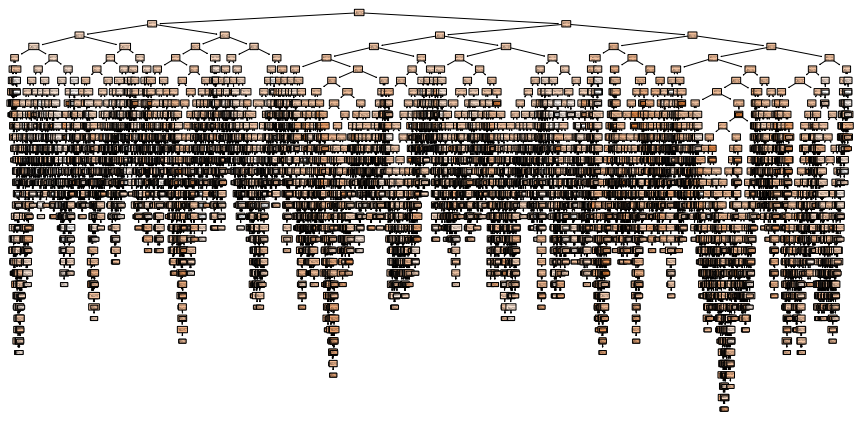

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 7.5))

plot_tree(clf_dt,
         filled=True,
         rounded=True)

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test)

ValueError: plot_confusion_matrix only supports classifiers

Cost Complexity Pruning:

In [59]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas
ccp_alaphas = ccp_alphas[:-1]

clf_dts = []

In [60]:
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [61]:
clf_dts

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.268499614355072e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.495349575790701e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.722199537226069e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.7221995372260976e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.062474479379339e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.062474479379339e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671225e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671225e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671261e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671261e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671279e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671297e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=3.266639444671297e-05, random_state=

Visualize Alpha:

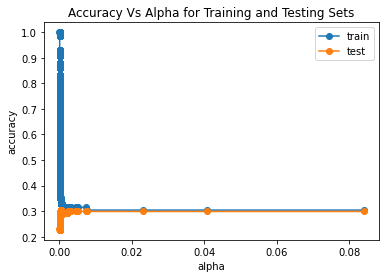

In [67]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy Vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

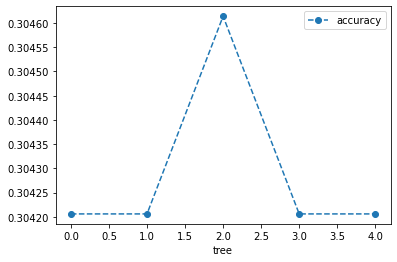

In [68]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.083)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

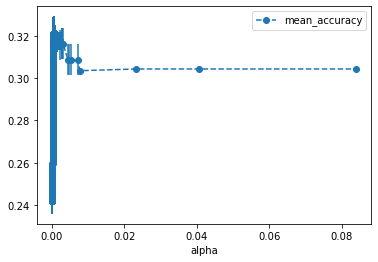

In [69]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                  y='mean_accuracy',
                  yerr= 'std',
                  marker='o',
                  linestyle='--',
                  figsize=(15, 7.5))

<AxesSubplot:xlabel='alpha'>

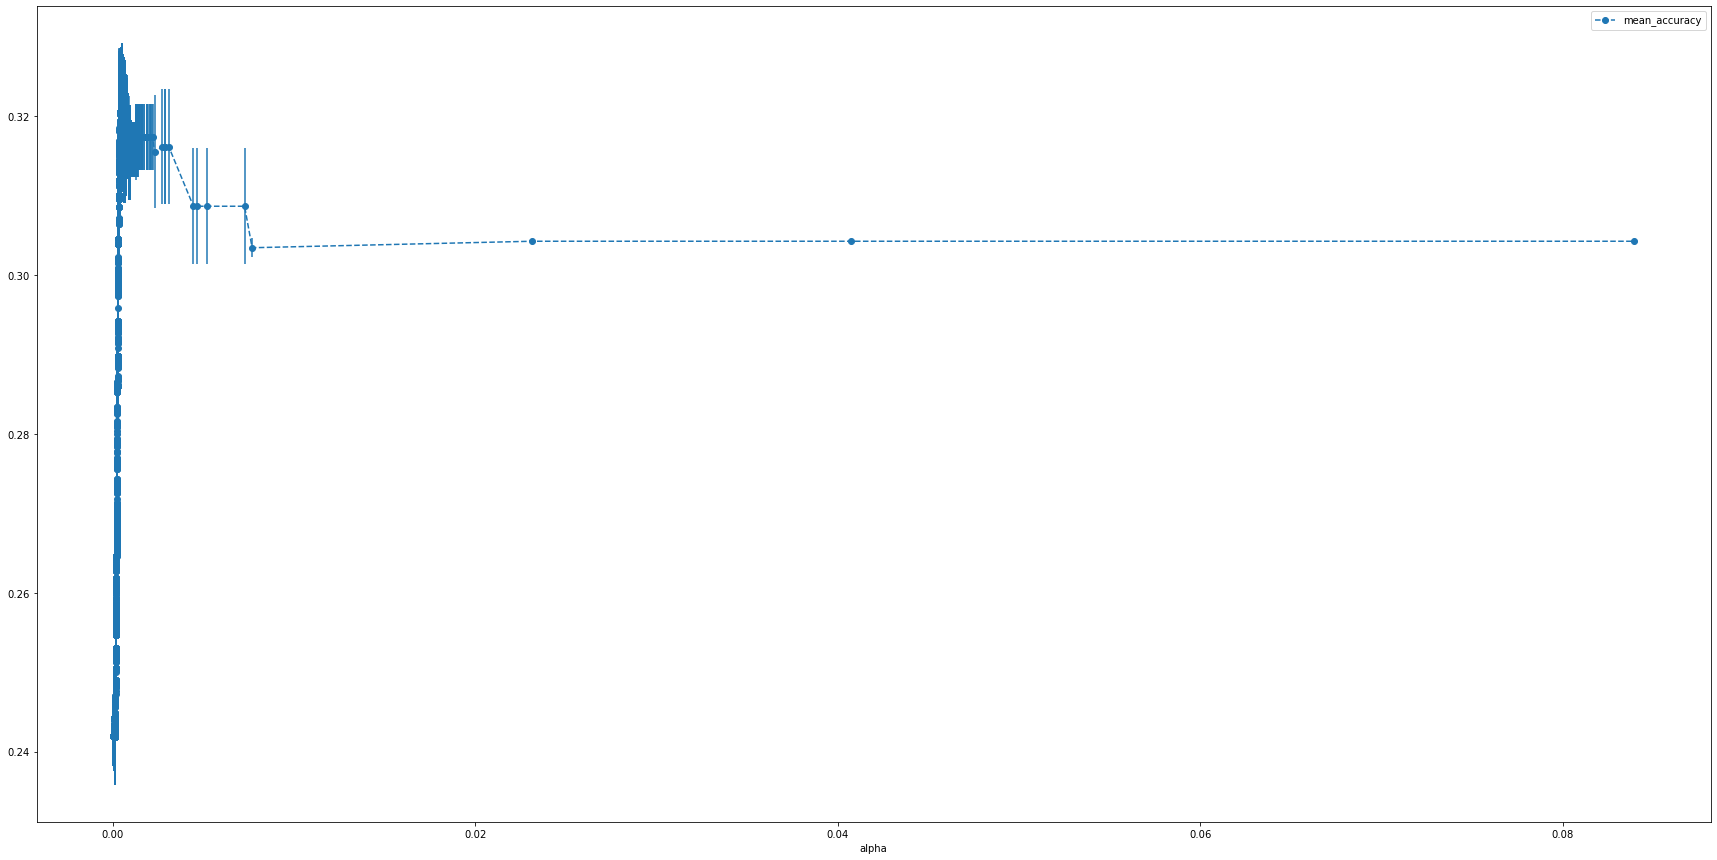

In [72]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                  y='mean_accuracy',
                  yerr= 'std',
                  marker='o',
                  linestyle='--',
                  figsize=(30, 15))

In [79]:
alpha_results[{alpha_results['alpha'] > 0.01}  & {alpha_results['alpha'] < 0.02}]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [77]:
ideal_ccp_alpha = alpha_results[{alpha_results['alpha'] > 0.014}
             &
             {alpha_results['alpha'] < 0.015}]['alpha']

ideal_ccp_alpha

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_dt_pruned, X_test, y_test)

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled = True, rounded=True)